# Import Standard Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



## Read Data

In [3]:
df=pd.read_csv("bigdatamart_Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Comment
- The training dataset consists of 8,523 rows,11 features,and one target variable.
- Some Features are Categorical in nature
- The dataset contains null values
- Missing data is present in the "item weight"and "Outlet Size" columns, which need to be imputed using an appropriate method.

## Check missing Value in Datasets

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df["Item_Fat_Content"].unique()                

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

## Identiyfying Unique Categories for categorical data

### 1.Item_Fat_Content

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_13664\1361188005.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Item_Fat_Content"],palette="rainbow")


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

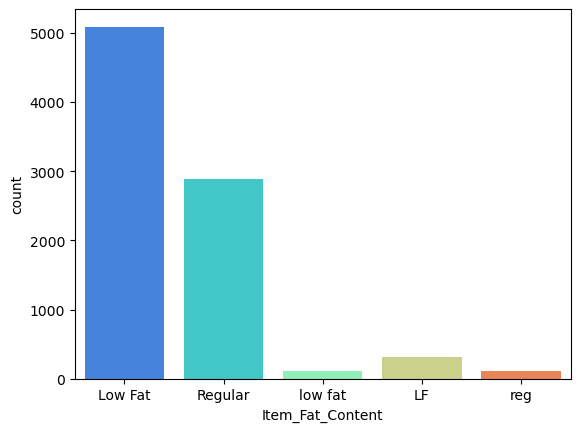

In [7]:
sns.countplot(x=df["Item_Fat_Content"],palette="rainbow")                

In [8]:
df["Item_Fat_Content"].value_counts()                

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

## Some of "Law Fat" values mis-coded as "low fat" and "LF".also,some of "regular" are mentioned as "reg".we are going to convert then into two catgoreis-1 low fat 2. Regular

In [9]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("reg","Regular")

In [10]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

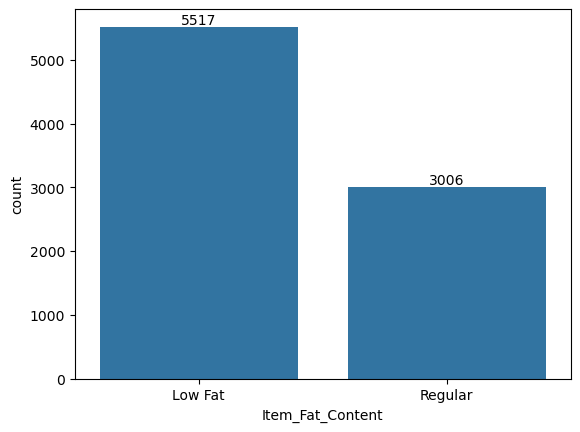

In [11]:
label=sns.countplot(x="Item_Fat_Content",data=df)
for i in label.containers:
    label.bar_label(i)

## Conclusion
The bar graph Show that "Low Fat" items (5,517) are more prevelant than "Regular" items (3,006),indicating a higher preference or availability of low_fat products in the dataset.

<Axes: ylabel='count'>

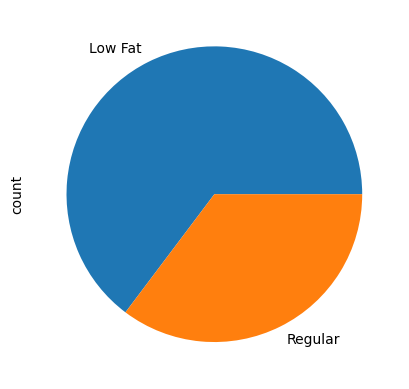

In [12]:
df["Item_Fat_Content"].value_counts().plot(kind="pie")

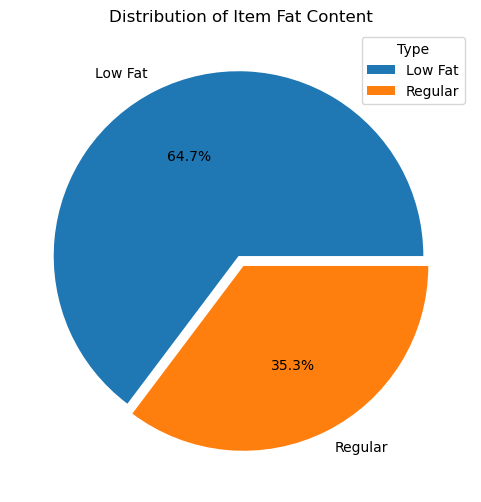

In [13]:
plt.figure(figsize=(6,6))
plt.pie(df["Item_Fat_Content"].value_counts().values,labels=df["Item_Fat_Content"].value_counts().index,autopct="%1.1f%%",explode=[0.03,0.03])
plt.title("Distribution of Item Fat Content")
plt.legend(title="Type",loc="upper right")
plt.show()

In [14]:
df["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [15]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

## Item_Type & Item_Identifier

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_13664\1321057703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Item_Type"],palette="rainbow")


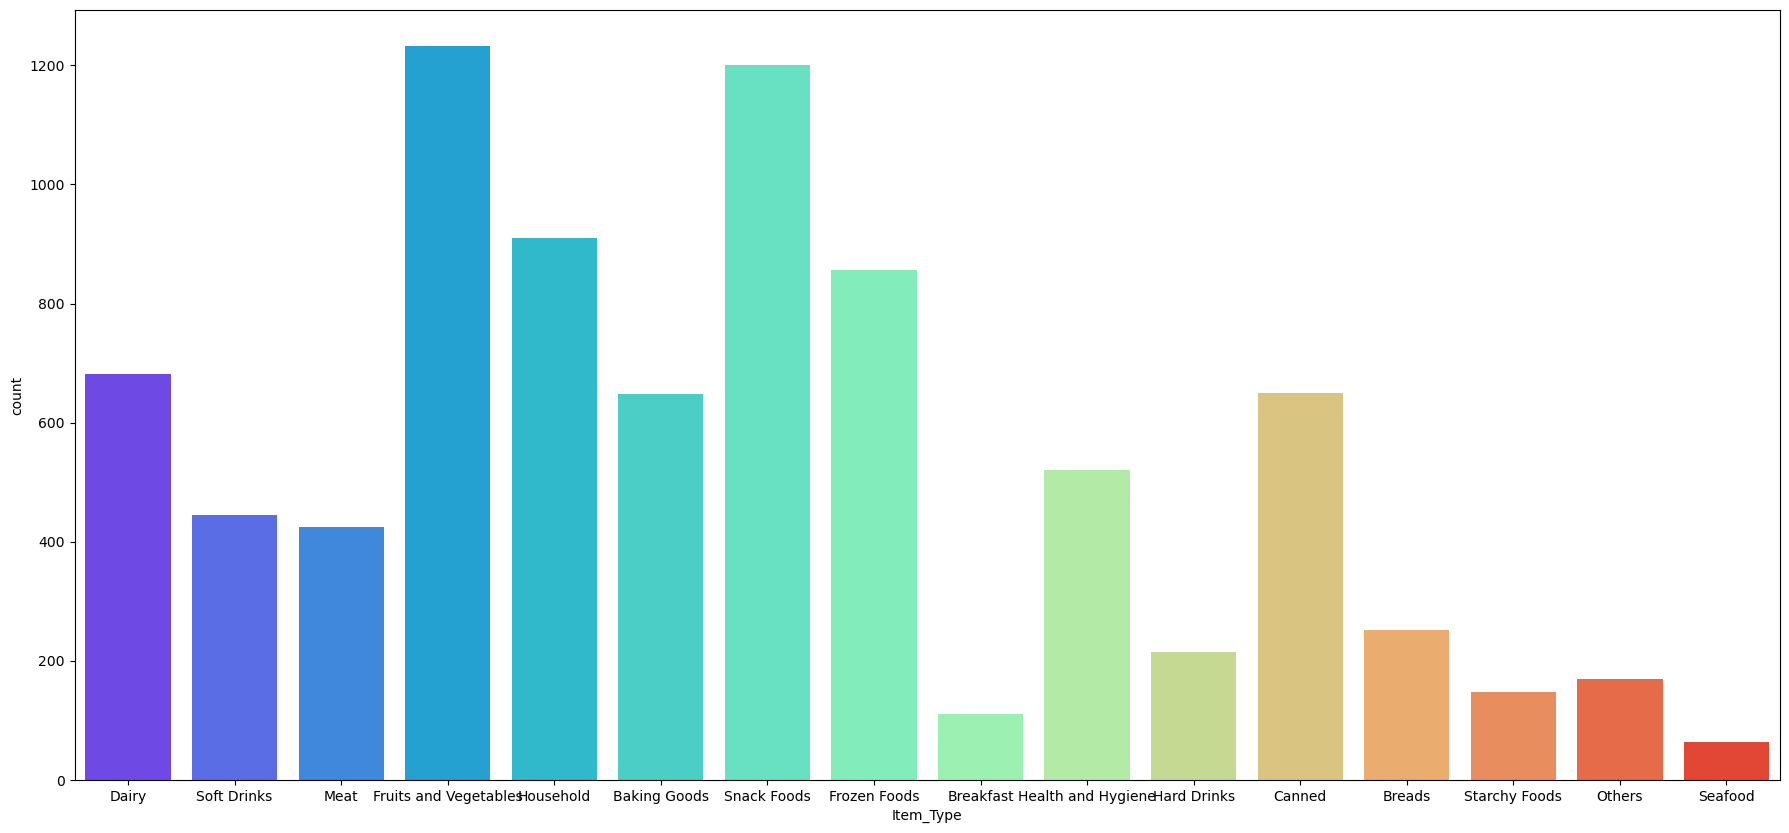

In [16]:
plt.figure(figsize=(22,10))
sns.countplot(x=df["Item_Type"],palette="rainbow")
plt.show()

## Conclusion
The bar graph Shows that "Fruits and Vegetables"and "Frozen Foods" have the highest sales, while "Seafood" and "Strachy Foods" have lowest.this indicates higher demand for fresh and frozen items compared to other categories

In [17]:
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

By examining the item_identifier, which is the unique ID for each item, I noticed that it begins with either FD, DR, or NC. These prefixes likely represent Food, Drinks, and Non-Consumables, respectively. Using this pattern, I created a new column to simplify further analysis.

### Item _Type Combined

In [18]:
df['Item_Type_Combined']=df['Item_Identifier'].apply(lambda x:x[0:2])
df['Item_Type_Combined']=df['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [19]:
df["Item_Type_Combined"].value_counts()

Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [20]:
df["Item_Type_Combined"].value_counts()

Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [21]:
df.loc[df["Item_Type_Combined"]=="Non-Consumable"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable
16,NCB42,11.80,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888,Non-Consumable
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672,Non-Consumable
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,Non-Consumable
31,NCS17,18.60,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8500,NCQ42,20.35,Low Fat,0.000000,Household,125.1678,OUT017,2007,NaN,Tier 2,Supermarket Type1,1907.5170,Non-Consumable
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688,Non-Consumable
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128,Non-Consumable
8516,NCJ19,18.60,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820,Non-Consumable


A fat content should not be specified for Non_Consumables them.So I creates a new category as Non_Edible fat content column

In [22]:
df.loc[df["Item_Type_Combined"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"

In [23]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

## Outlet_Identifier

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_13664\3617472103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Outlet_Identifier"],palette="spring")


<Axes: xlabel='Outlet_Identifier', ylabel='count'>

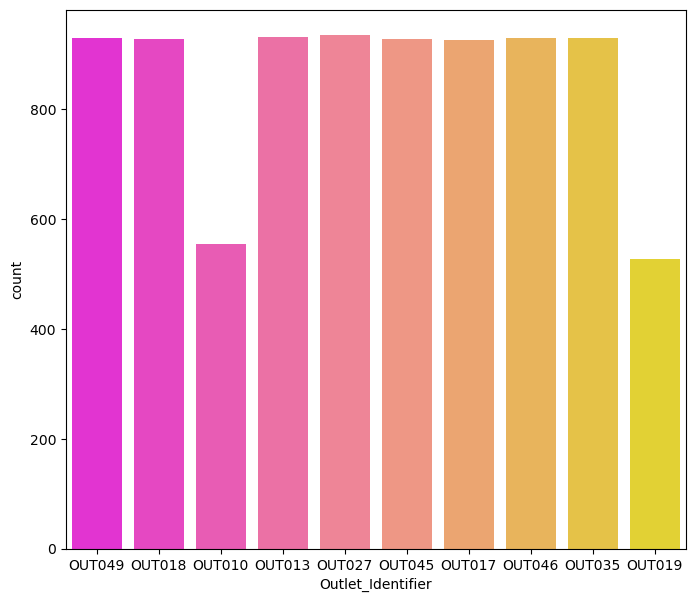

In [54]:
plt.figure(figsize=(8,7))
sns.countplot(x=df["Outlet_Identifier"],palette="spring")

## Conclusion
The bar chart displays the count of various items labeled as "OUT" with different numbers. The bars, transitioning from pink to yellow, indicate varying frequencies, with some items showing higher counts while others, like OUT010 and OUT019, have lower counts.

In [25]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

## Outlet_Type

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_13664\2544157585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Outlet_Type"],palette="spring")


<Axes: xlabel='Outlet_Type', ylabel='count'>

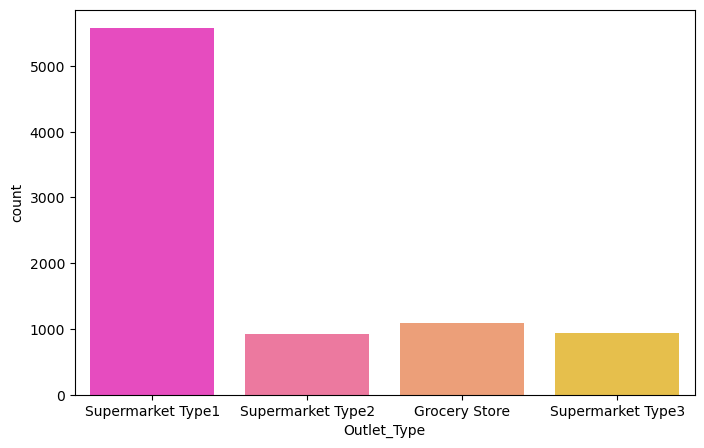

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Outlet_Type"],palette="spring")

### Conclusion
The bar chart displays the count of various items labeled as "OUT" with different numbers. The bars, transitioning from pink to yellow, indicate varying frequencies, with some items showing higher counts while others, like OUT010 and OUT019, have lower counts.

In [27]:
df["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

## Outlet_Location_Type

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_13664\1242796218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Outlet_Location_Type"],palette="spring")


<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

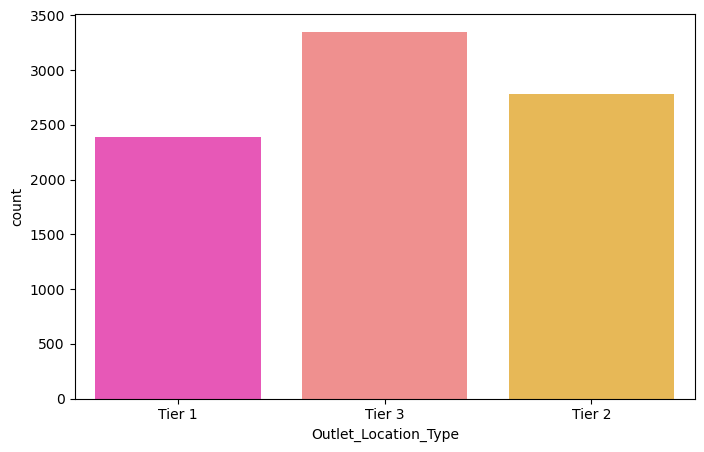

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Outlet_Location_Type"],palette="spring")

## Conclusion
The bar graph displays the count of occurrences for different outlet location types: Tier 1, Tier 2, and Tier 3. The data reveals that Tier 3 has the highest count, followed by Tier 2, while Tier 1 has the lowest count. This indicates that Tier 3 locations are more prevalent compared to the other tiers.

## Imputation of item weight

In [29]:
df.groupby("Item_Type")["Item_Weight"].value_counts(dropna=False)

Item_Type      Item_Weight
Baking Goods   NaN            112
               9.800           15
               15.500          14
               17.750          14
               9.195           12
                             ... 
Starchy Foods  10.500           3
               14.000           3
               20.500           3
               21.200           3
               18.000           1
Name: count, Length: 1197, dtype: int64

In [30]:
df["Item_Weight"]=df.groupby("Item_Type")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [31]:
df["Item_Weight"].isnull().sum()

0

In [32]:
df.groupby("Item_Type")["Item_Weight"].value_counts(dropna=False)

Item_Type      Item_Weight
Baking Goods   12.277108      112
               9.800000        15
               15.500000       14
               17.750000       14
               9.195000        12
                             ... 
Starchy Foods  10.500000        3
               14.000000        3
               20.500000        3
               21.200000        3
               18.000000        1
Name: count, Length: 1197, dtype: int64

In [33]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [34]:
df["Outlet_Size"].isna().sum()

2410

<Axes: xlabel='Outlet_Size', ylabel='count'>

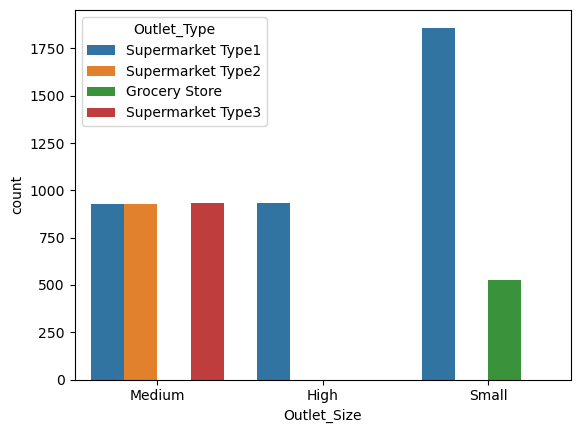

In [35]:
sns.countplot(x="Outlet_Size",hue="Outlet_Type",data=df)

### Conclusion
The bar graph illustrates the distribution of different outlet types (Supermarket Type1, Supermarket Type2, Grocery Store, and Supermarket Type3) across various outlet sizes (Medium, High, and Small). Supermarket Type1 dominates the Small outlet size, while all three supermarket types (Type1, Type2, and Type3) show similar counts in the Medium and High outlet sizes. Grocery stores are primarily associated with Small outlet sizes, with relatively lower counts compared to other types.

In [36]:
df["Outlet_Size"].fillna("unkown",inplace=True)

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_13664\4278075838.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Outlet_Size"].fillna("unkown",inplace=True)


## Outlet_Size

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_13664\1418147368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Outlet_Size"],palette="spring")


<Axes: xlabel='Outlet_Size', ylabel='count'>

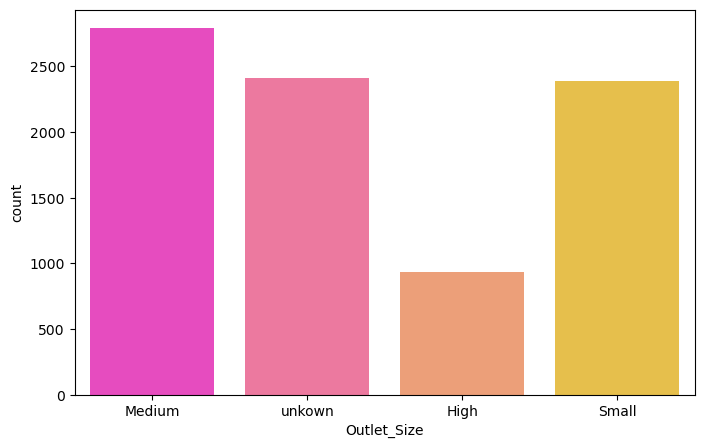

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Outlet_Size"],palette="spring")

## Conclusion
The bar graph shows the distribution of outlet sizes. The "Medium" size has the highest count, followed by "Unknown" and "Small," while the "High" size has the lowest count. This indicates that medium-sized outlets are the most common, while high-sized ones are the least frequent.

## Item_Visibility

In [38]:
df["Item_Visibility"].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [39]:
df[df["Item_Visibility"]==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
3,FDX07,19.20000,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,unkown,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93000,Non-Edible,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable
5,FDP36,10.39500,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Food
10,FDY07,11.80000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,Food
32,FDP33,18.70000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,12.98788,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020,Food
8484,DRJ49,6.86500,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736,Drinks
8486,FDR20,20.00000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,unkown,Tier 3,Grocery Store,45.2744,Food
8494,NCI54,15.20000,Non-Edible,0.0,Household,110.4912,OUT017,2007,unkown,Tier 2,Supermarket Type1,1637.8680,Non-Consumable


The min value of item_visibility is 0,but this can not be as every item store must have some visibility

In [40]:
df[df["Item_Visibility"]==0]["Item_Identifier"].nunique()

446

#### visual check that the 0 values in the first 10 entries have been replaced

In [41]:
df["Item_Visibility"]=df["Item_Visibility"].replace(0,np.nan)

In [42]:
df["Item_Visibility"].fillna(df["Item_Visibility"].median(),inplace=True)

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_13664\2171307727.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Item_Visibility"].fillna(df["Item_Visibility"].median(),inplace=True)


In [43]:
df[df["Item_Visibility"]==0]["Item_Identifier"].nunique()

0

### Outlet_Establishment_Year

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

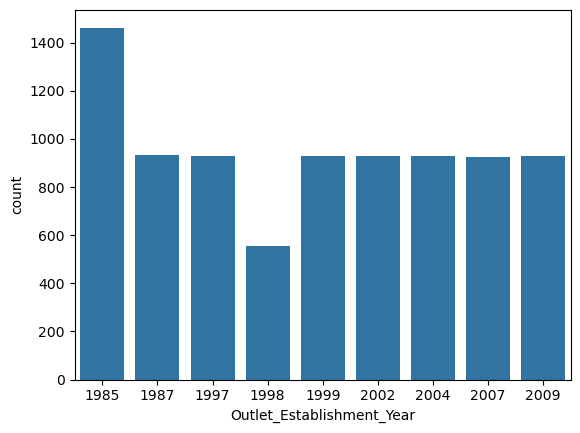

In [44]:
sns.countplot(x=df["Outlet_Establishment_Year"])

### Conclusion
The bar chart illustrates the count of outlets established over various years. The highest number of establishments occurred in 1985, while 1998 saw the lowest. From 1999 onwards, the count remained relatively stable, indicating a consistent trend in outlet establishment.

In [45]:
df["Outlet_Age"]=df["Outlet_Establishment_Year"].apply(lambda x:2013-x)

In [46]:
df["Outlet_Age"].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Age, dtype: int64

In [47]:
numerical=df.select_dtypes(exclude="object")

C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_13664\1484553052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_13664\1484553052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Ruchi shukla\AppData\Lo

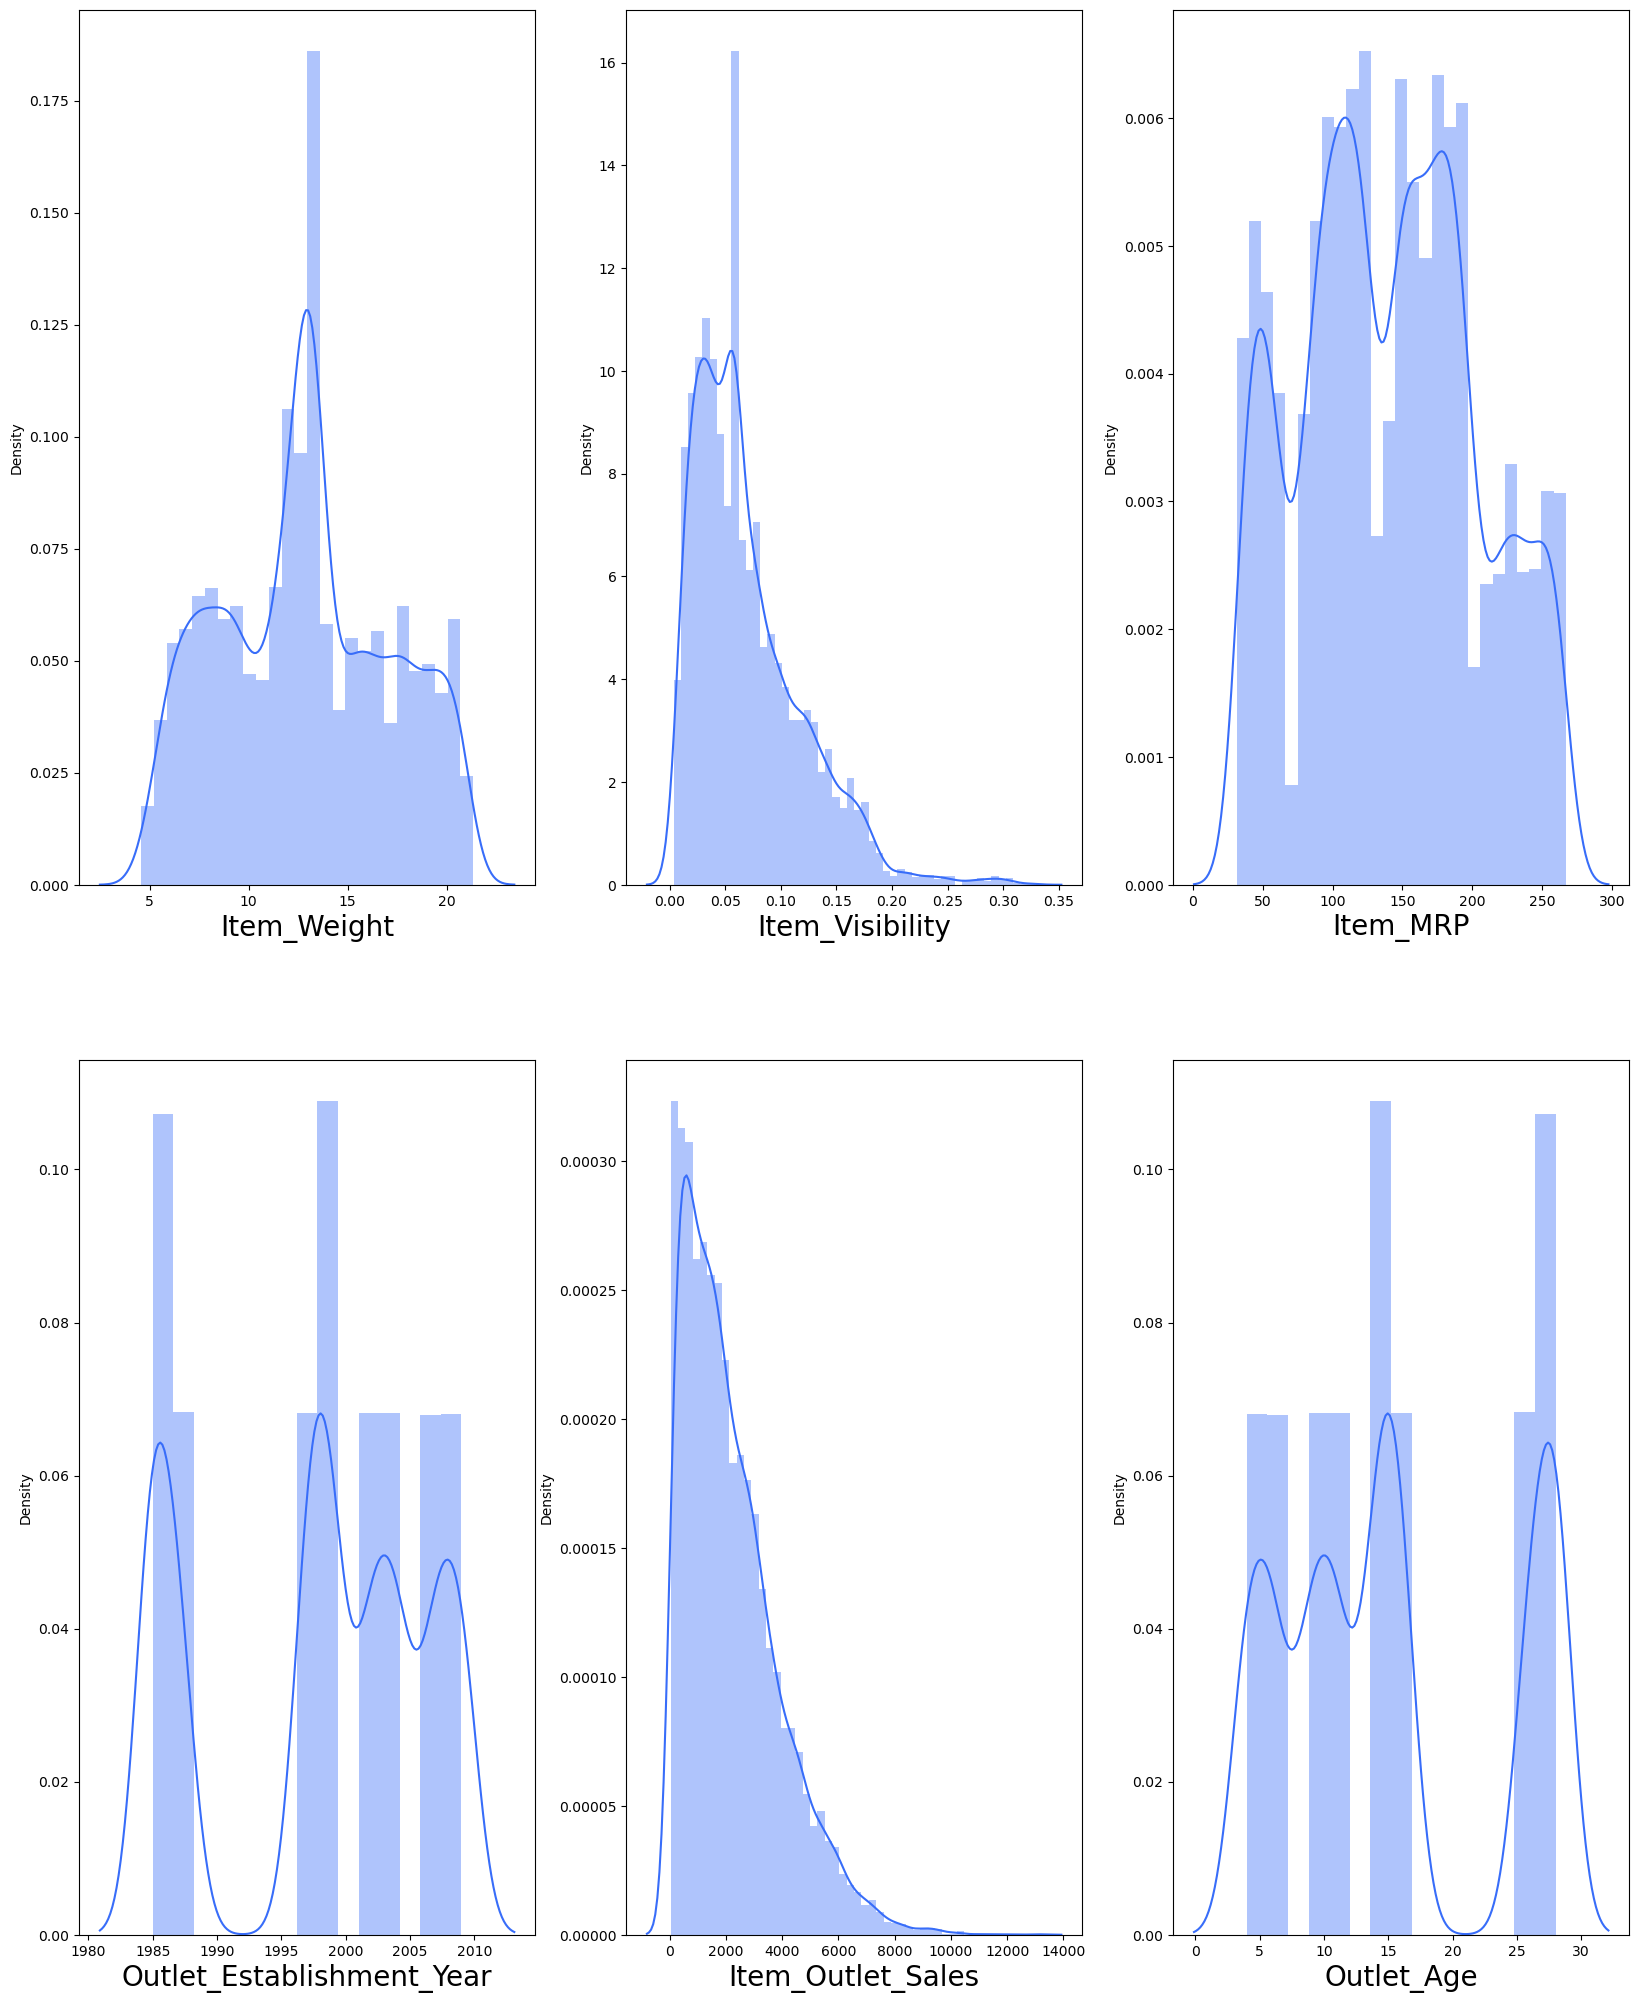

In [48]:
plt.figure(figsize=(20,25),facecolor="white")
sns.set_palette("rainbow")
plotnumber=1
for column in numerical:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


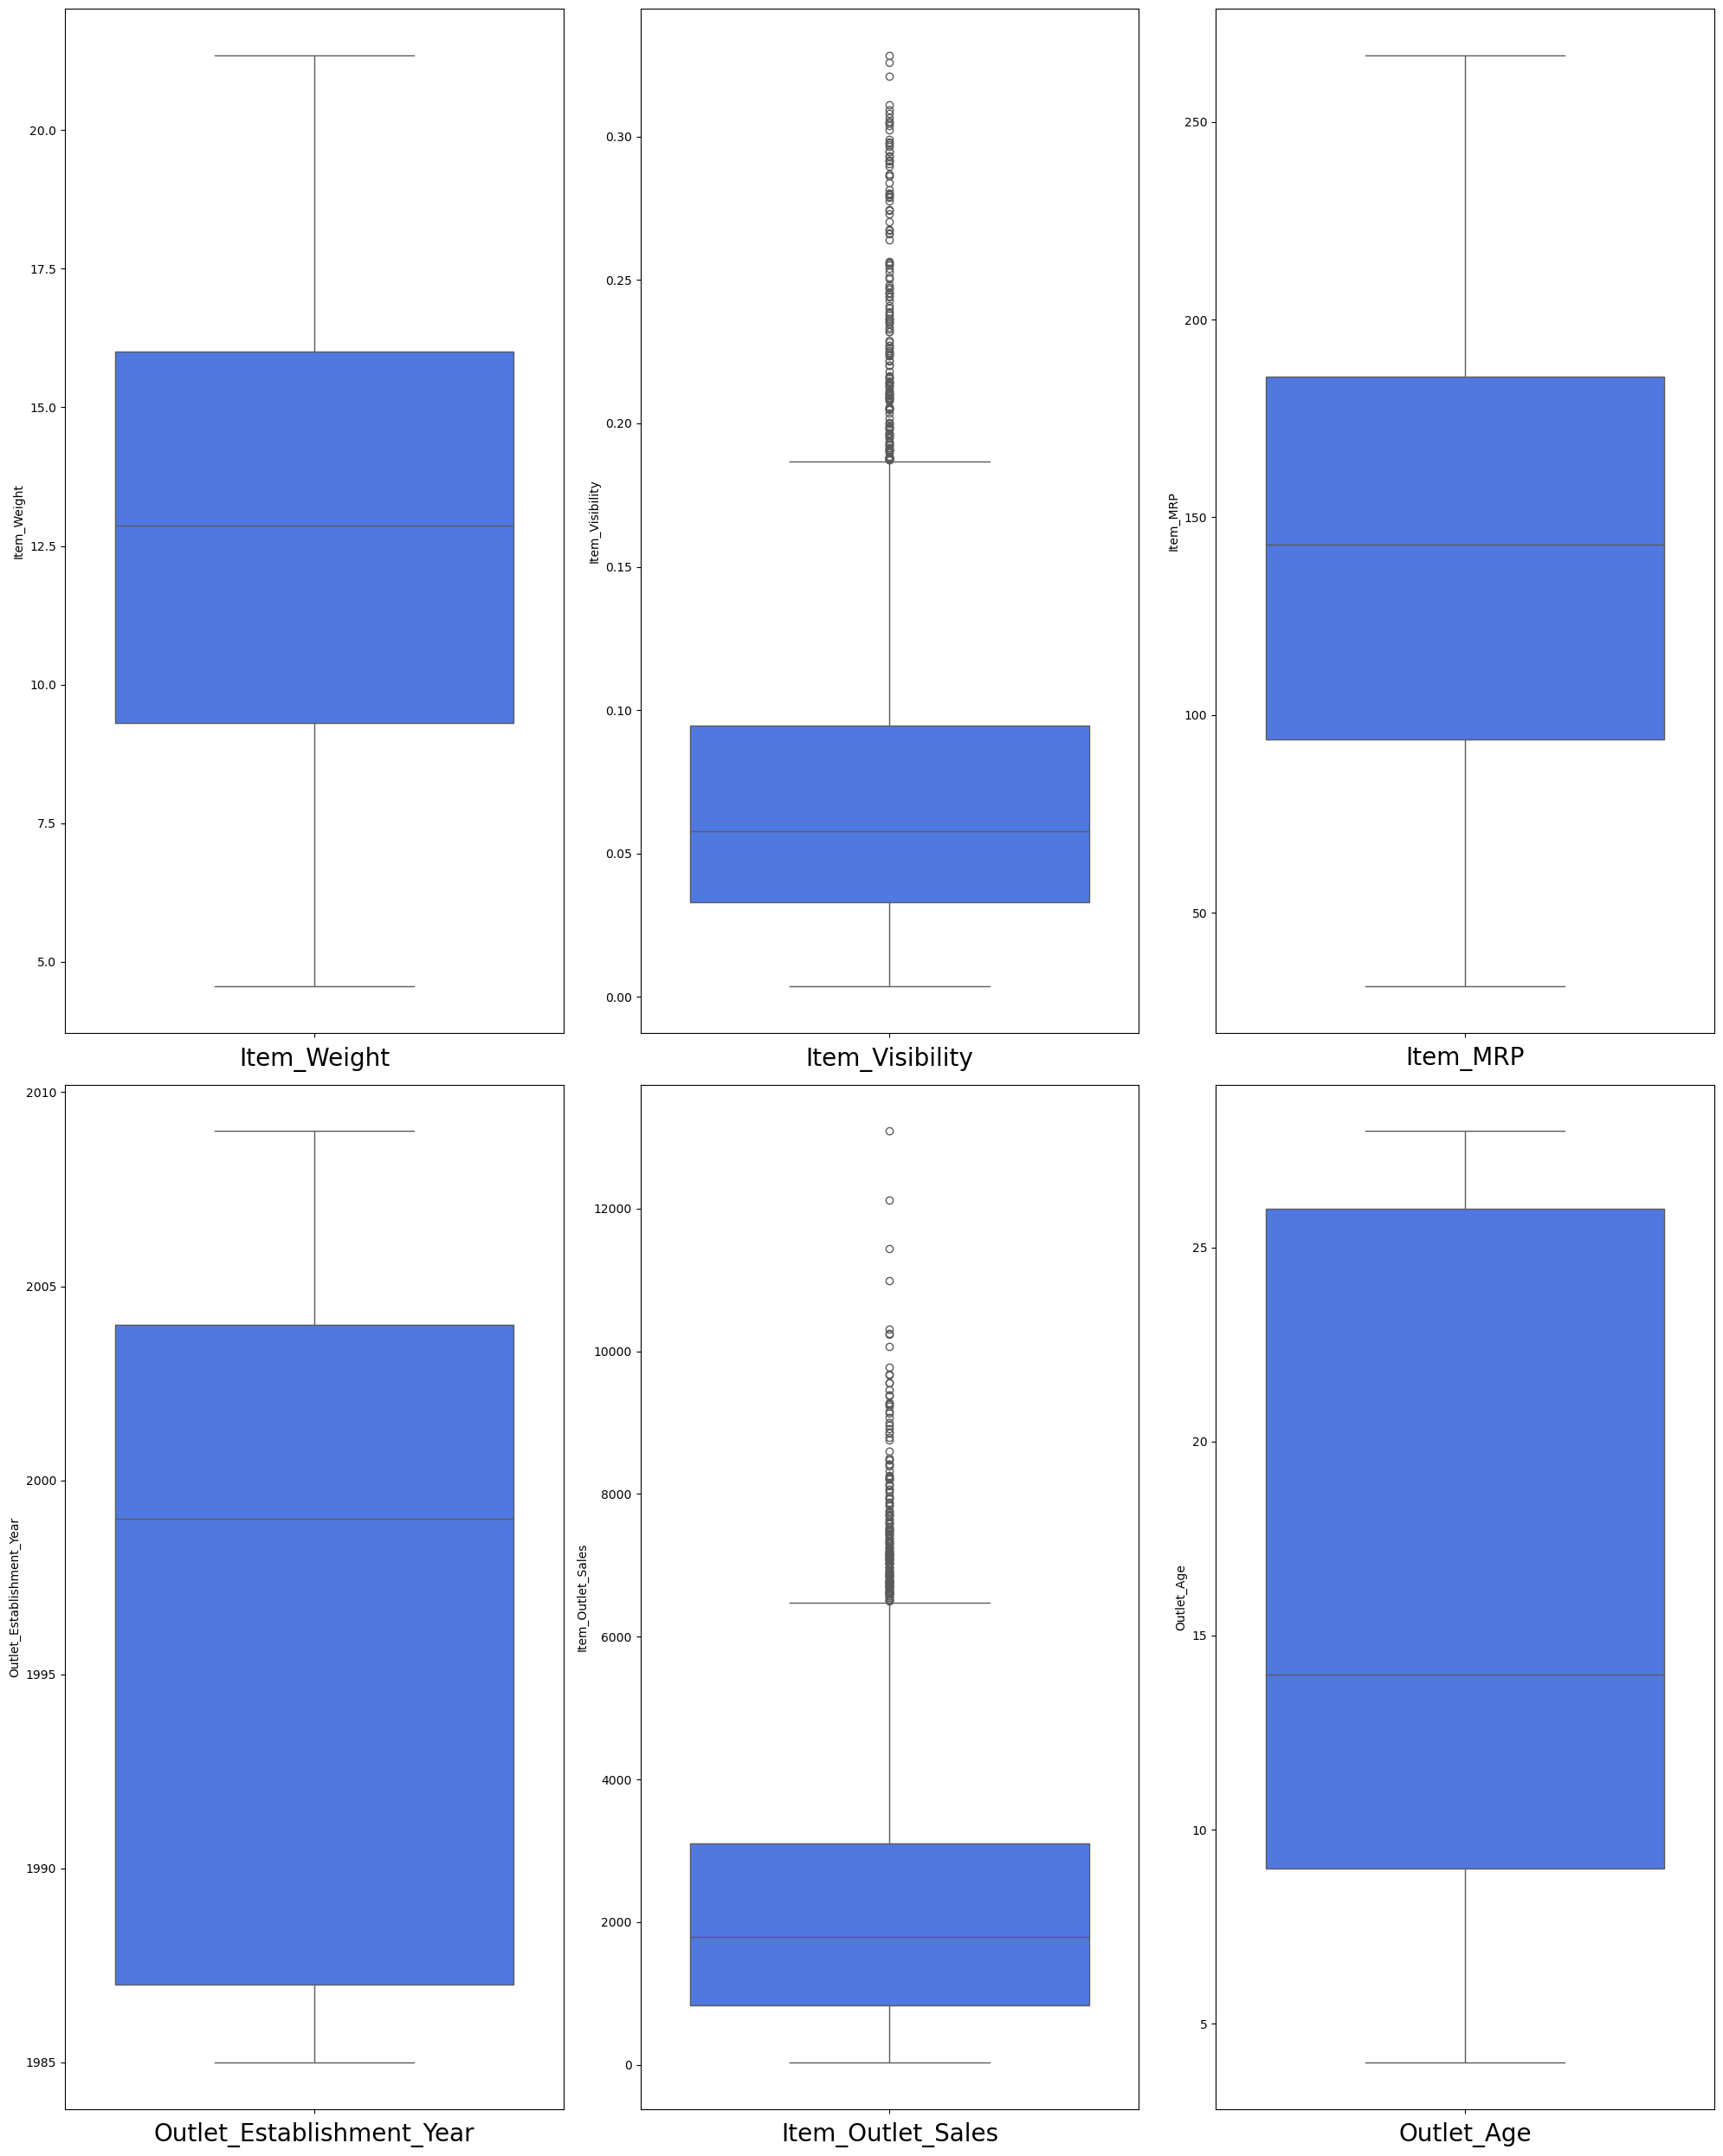

In [49]:
plt.figure(figsize=(20,25),facecolor="white")
sns.set_palette("rainbow")
plotnumber=1
for column in numerical:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


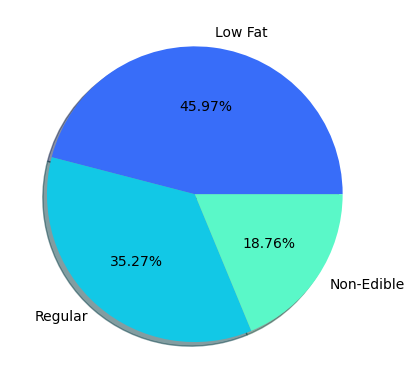

In [50]:
fig,ax=plt.subplots()
ax.pie(df.Item_Fat_Content.value_counts(),labels=df.Item_Fat_Content.value_counts().index,radius=1,autopct="%1.2f%%",shadow=True)
plt.show()

### Conclusion
This pie chart represents the distribution of three categories: Low Fat, Regular, and Non-Edible. The largest portion, 45.97%, corresponds to Low Fat, followed by Regular at 35.27%, and Non-Edible at 18.76%. This indicates that Low Fat products dominate the dataset, while Non-Edible items form the smallest portion.

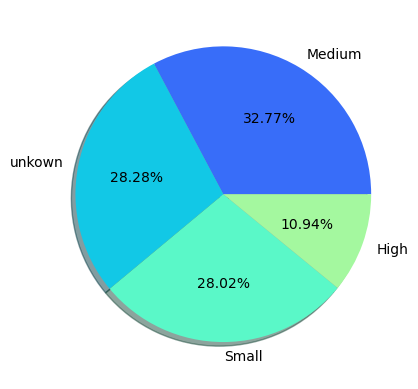

In [51]:
plt.pie(df.Outlet_Size.value_counts(),labels=df.Outlet_Size.value_counts().index,radius=1,autopct="%1.2f%%",shadow=True)
plt.show()

### Conclusion
The pie chart shows the distribution across four categories: Medium, Small, High, and Unknown. Medium holds the highest percentage at 32.77%, followed by Unknown at 28.28% and Small at 28.02%. The High category accounts for the smallest portion at 10.94%. This indicates that Medium is the most dominant category.